# Figure 1b. Number of detectable and mappable xQTL loci in single−context fine−mapping
The x axis represents the number of detectable or mappable xQTL loci, the y axis represents the context

## detectable xQTL loci in single-context fine-mapping

In [2]:
# Install required packages
install.packages(c("data.table", "dplyr", "ggplot2"))
library(data.table)
library(dplyr)
library(ggplot2)
single_context_detectable_events_summary <- readRDS("~/project/Figure_codes/data/Figure_1b_ii_1.rds")
### define category color"
color_palette <- c("1" = "#3578A3", "2" = "#4B8F78", "3" = "#EA5E2C", "4" = "#CDBA2E", "5" = "#E69933", "6" = "#592357")


The downloaded binary packages are in
	/var/folders/vt/_frn4tt55gg3k2w_vb918mrh0000gn/T//Rtmpqhy8Tm/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in gzfile(file, "rb"):
“cannot open compressed file '/Users/shaoyuekun/project/Figure_codes/data/Figure_1b_ii_1.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [3]:
head(top_loci_meta_file)

#chr,start,end,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource,pip_sum,event_ID_n_detectable,event_ID_detectable_variant_count,event_ID_n_mappable
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,903284,903285,C,T,chr1:903285:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903351,903352,A,G,chr1:903352:G:A,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903509,903510,G,A,chr1:903510:A:G,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903535,903536,T,A,chr1:903536:A:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904080,904081,C,T,chr1:904081:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904114,904115,T,G,chr1:904115:G:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0


In [3]:
#color_palette <- brewer.pal(6, "Set2")

# First: calculate total counts per resource
total_counts <-  single_context_detectable_events_summary%>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_detectable_events_summary$resource <- factor(single_context_detectable_events_summary$resource, levels = rev(levels(ordered_resources)))

#pdf("single_context_stacked_plot_detectable.pdf", width =10, height = 10)
# Create stacked bar plot
p1 <- ggplot(single_context_detectable_events_summary, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

ERROR: Error: object 'single_context_detectable_events_summary' not found


In [4]:
options(repr.plot.width = 18, repr.plot.height = 14)
p1

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1417275621.py, line 1)

## mappable xQTL loci in single-context fine-mapping

In [10]:
#install packages 

#install.packages(c("ggplot2", "dplyr", "scales"))
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
## Hillary Edit
## Rename contexts_metadata: Rename Kellis to MIT and DeJager to CUIMC1 (if "OPC", "Mic", "Inh", "Ast", "Oli", "Exc" in the names)

library(dplyr)

# Load contexts_metadata

contexts_metadata <- read.csv("/Users/shaoyuekun/Desktop/Dr.Wang/metadata/contexts_metadata_updated.csv", 
                              stringsAsFactors = FALSE)


# Rename context column 

cell_types <- c("OPC", "Mic", "Inh", "Ast", "Oli", "Exc")

# Create renamed context column
contexts_metadata$context <- sapply(contexts_metadata$context, function(name) {
  contains_cell <- any(sapply(cell_types, function(cell) grepl(cell, name)))
  
  if(contains_cell) {
    name <- gsub("Kellis", "MIT", name)
    name <- gsub("DeJager", "CUIMC1", name)
  }
  
  return(name)
})

# Optional: Save the renamed metadata

# output_path <- "/Users/shaoyuekun/Desktop/Dr.Wang/metadata/contexts_metadata_renamed.csv"
# write.csv(contexts_metadata, output_path, row.names = FALSE)

cat("✓ Metadata renaming complete.\n")

✓ Metadata renaming complete.


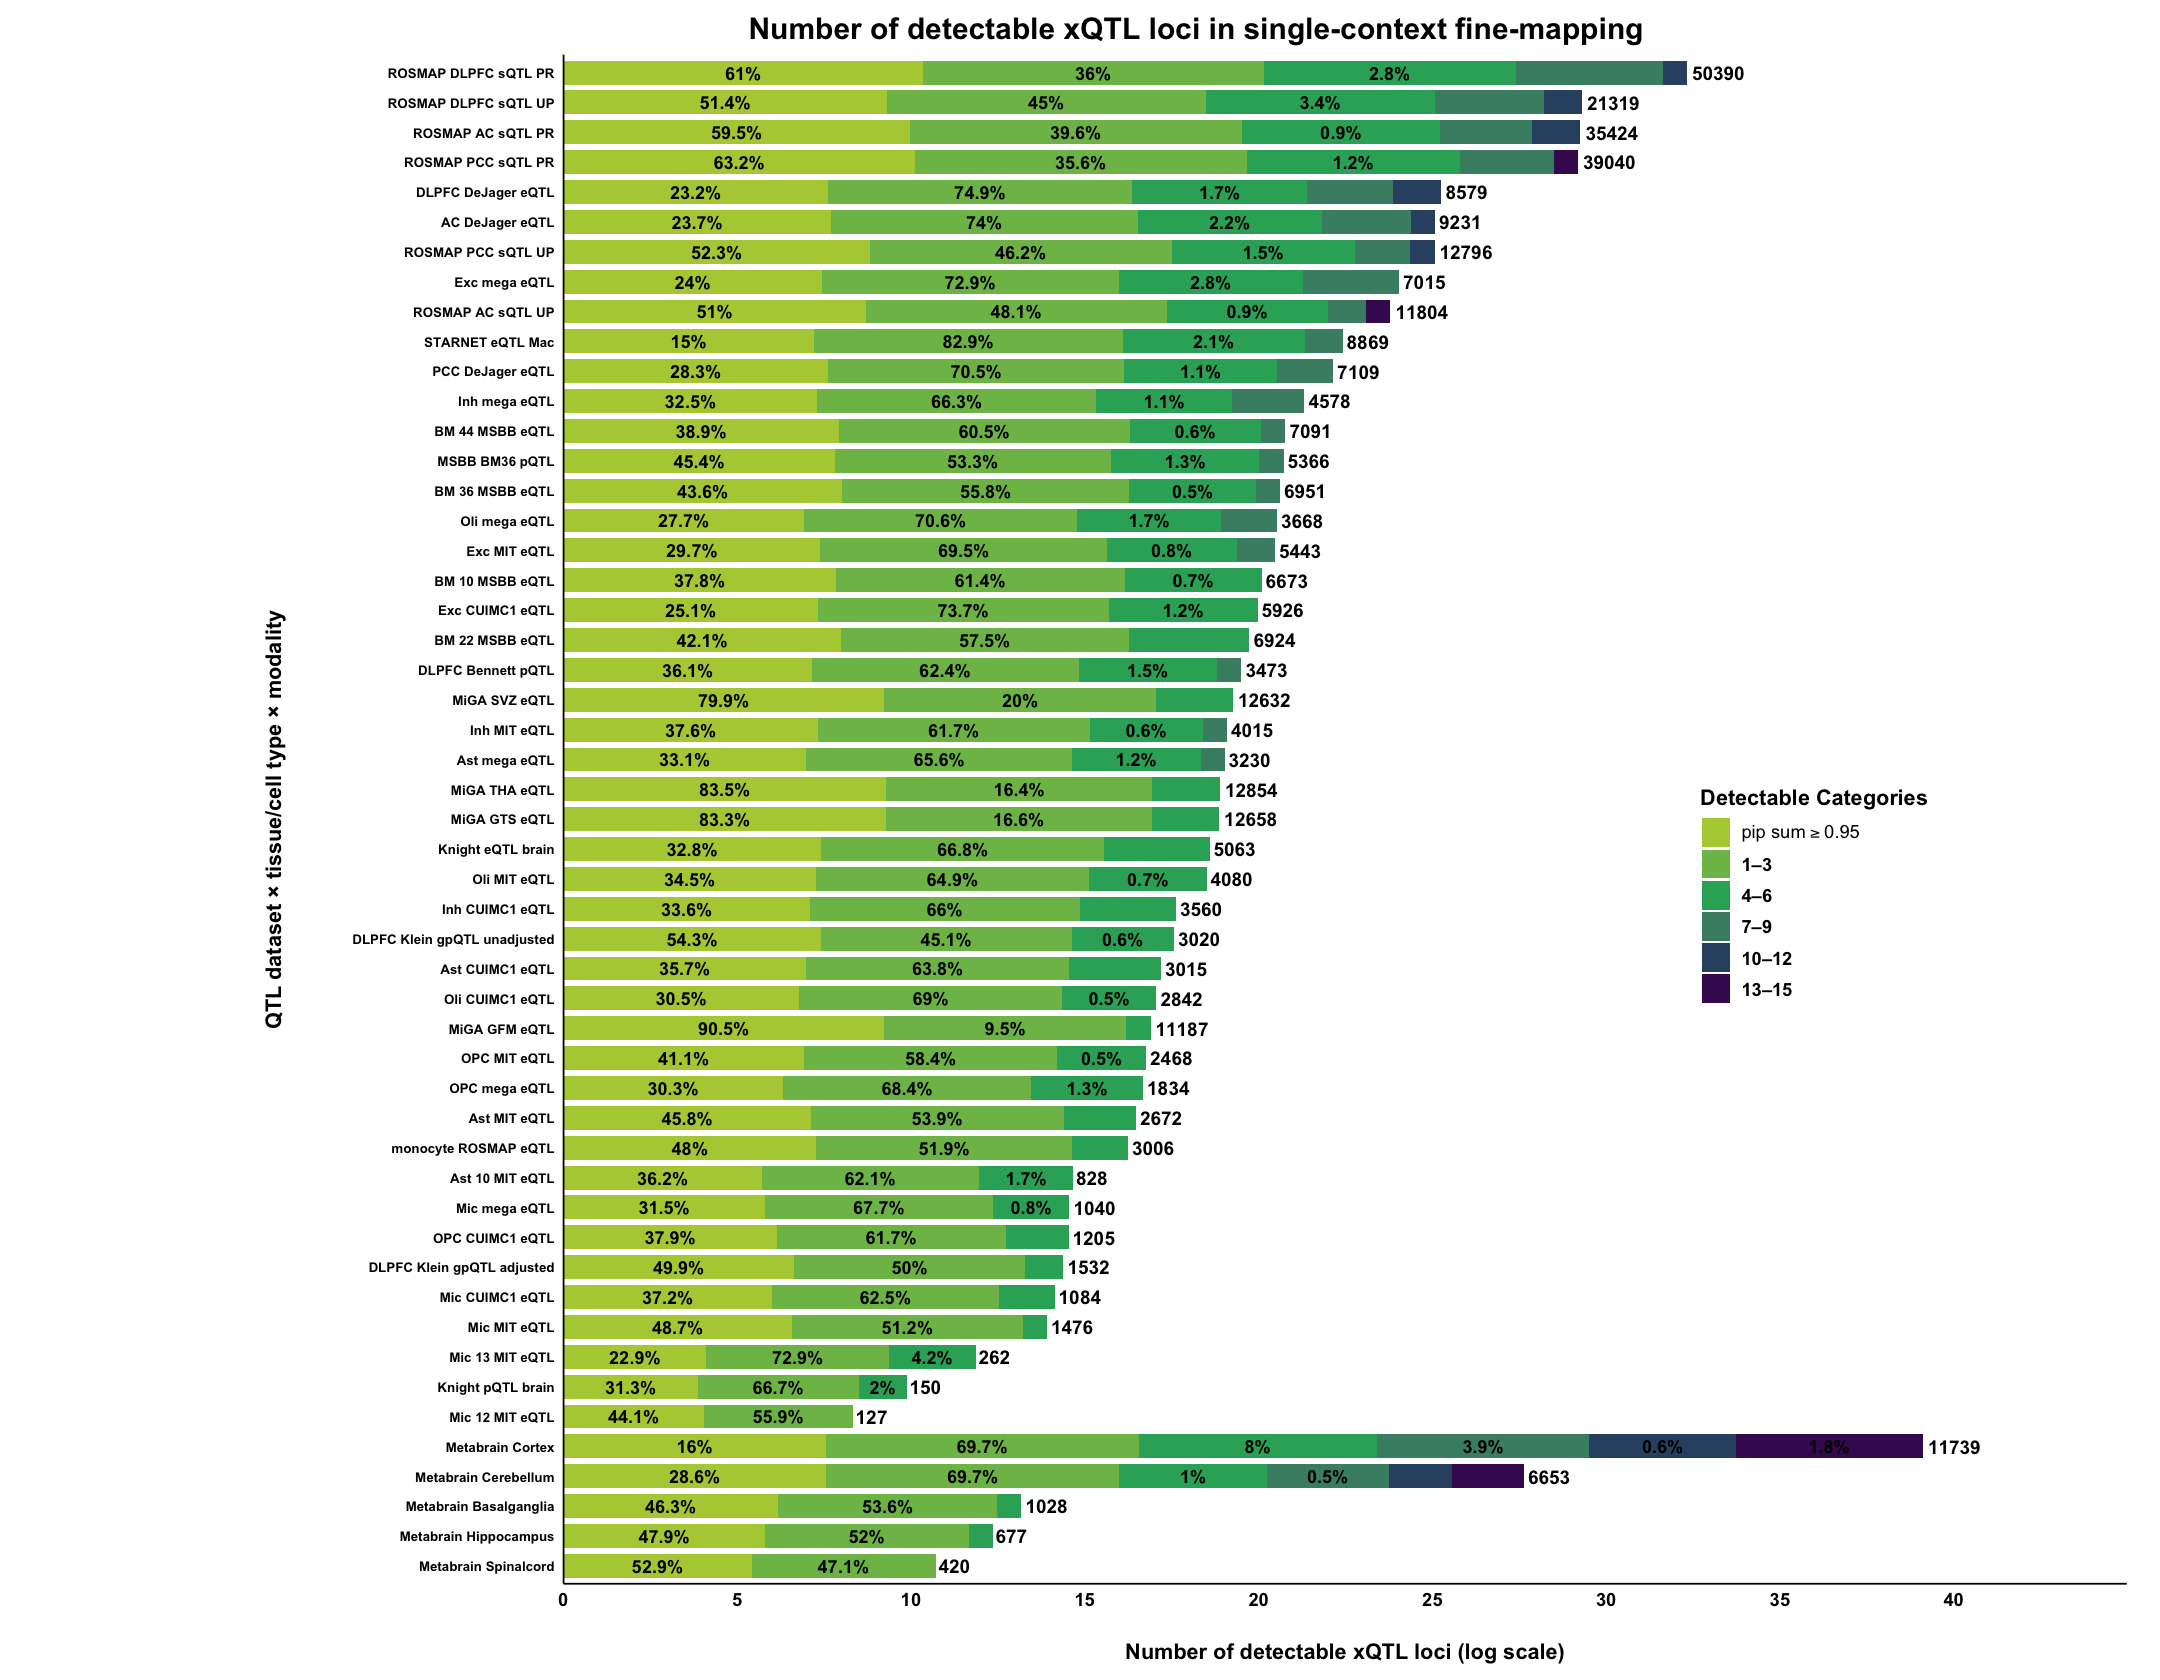

In [5]:
# figure_1b_p1 (detatable data)

library(ggplot2)
library(dplyr)

# Load data and renamed contexts_metadata

figure_1b_data <- readRDS("/Users/shaoyuekun/Desktop/Dr.Wang/Figure_1b_num_xQTL_loci_single_context_2.rds")

# Preserve the original factor level order
original_order <- levels(figure_1b_data$detectable_data$resource)
figure_1b_data$detectable_data$resource <- as.character(figure_1b_data$detectable_data$resource)

# Create mapping function to match data with metadata
apply_metadata_mapping <- function(resource_names, contexts_metadata) {
  result <- character(length(resource_names))
  
  for(i in seq_along(resource_names)) {
    name <- resource_names[i]
  
    cell_types <- c("OPC", "Mic", "Inh", "Ast", "Oli", "Exc")
    contains_cell <- any(sapply(cell_types, function(cell) grepl(cell, name)))
    
    if(contains_cell) {
      # Transform original data name to match metadata format
      metadata_key <- name
      metadata_key <- gsub("Kellis", "MIT", metadata_key)      # Kellis -> MIT
      metadata_key <- gsub("DeJager", "CUIMC1", metadata_key)  # DeJager -> CUIMC1
      
      # Look for match in metadata
      match_row <- contexts_metadata[contexts_metadata$context == metadata_key, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    } else {
      # For non-cell-type entries, try direct match
      match_row <- contexts_metadata[contexts_metadata$context == name, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    }
  }
  
  return(result)
}

# Apply mapping to the data
figure_1b_data$detectable_data$mapped_resource <- apply_metadata_mapping(
  figure_1b_data$detectable_data$resource, 
  contexts_metadata
)

# Replace underscores with spaces for display
figure_1b_data$detectable_data$mapped_resource <- gsub("_", " ", 
                                                        figure_1b_data$detectable_data$mapped_resource)

# Calculate percentages and total counts
figure_1b_data$detectable_data <- figure_1b_data$detectable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

figure_1b_data$color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")

options(repr.plot.width = 18, repr.plot.height = 14)
theme_set(theme_minimal(base_family = "Roboto"))

p1 <- ggplot(figure_1b_data$detectable_data,
             aes(x = factor(resource, levels = original_order), 
                 y = log_gene_count, 
                 fill = n_detectable_category)) +
  
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                                paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.8, fontface = "bold", lineheight = 0.9) +
  geom_text(data = function(x) x %>% 
              group_by(resource) %>%
              summarise(total_count = first(total_count), 
                        log_gene_count = sum(log_gene_count),
                        .groups = 'drop'),
            aes(x = factor(resource, levels = original_order), 
                y = log_gene_count, 
                label = total_count),
            hjust = -0.1, vjust = 0.5,
            color = "black", size = 4, fontface = "bold", inherit.aes = FALSE) +
  scale_fill_manual(values = figure_1b_data$color_palette_new, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                  "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  scale_x_discrete(labels = setNames(
    figure_1b_data$detectable_data$mapped_resource[
      match(unique(figure_1b_data$detectable_data$resource), 
            figure_1b_data$detectable_data$resource)],
    unique(figure_1b_data$detectable_data$resource)
  )) +
  labs(
    title = "Number of detectable xQTL loci in single-context fine-mapping",
    x = "QTL dataset × tissue/cell type × modality",   
    y = "Number of detectable xQTL loci (log scale)"   
  ) +
  coord_flip(clip = "off") +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 8),
                     labels = scales::comma,
                     expand = expansion(mult = c(0, 0.15))) + 
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "black"),   
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 11, color = "black", face = "bold"),
    axis.text.y = element_text(size = 8, color = "black", face = "bold"),
    
    axis.title.x = element_text(size = 13, face = "bold", margin = margin(t = 20), color = "black"), 
    axis.title.y = element_text(size = 13, face = "bold", margin = margin(r = 40), color = "black"),               
    
    legend.text = element_text(size = 11, color = "black", face = "bold"),
    legend.title = element_text(size = 13, face = "bold", color = "black"),
    legend.position = c(0.8, 0.45),
    legend.key.size = unit(1.3, "lines"),                              
    legend.key.height = unit(1.3, "lines"),
    legend.key.width = unit(1.3, "lines"),
    
    panel.grid = element_blank(),        
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    axis.line = element_line(color = "black", linewidth = 0.5),
    
    plot.margin = margin(10, 20, 10, 160)
  )

print(p1)



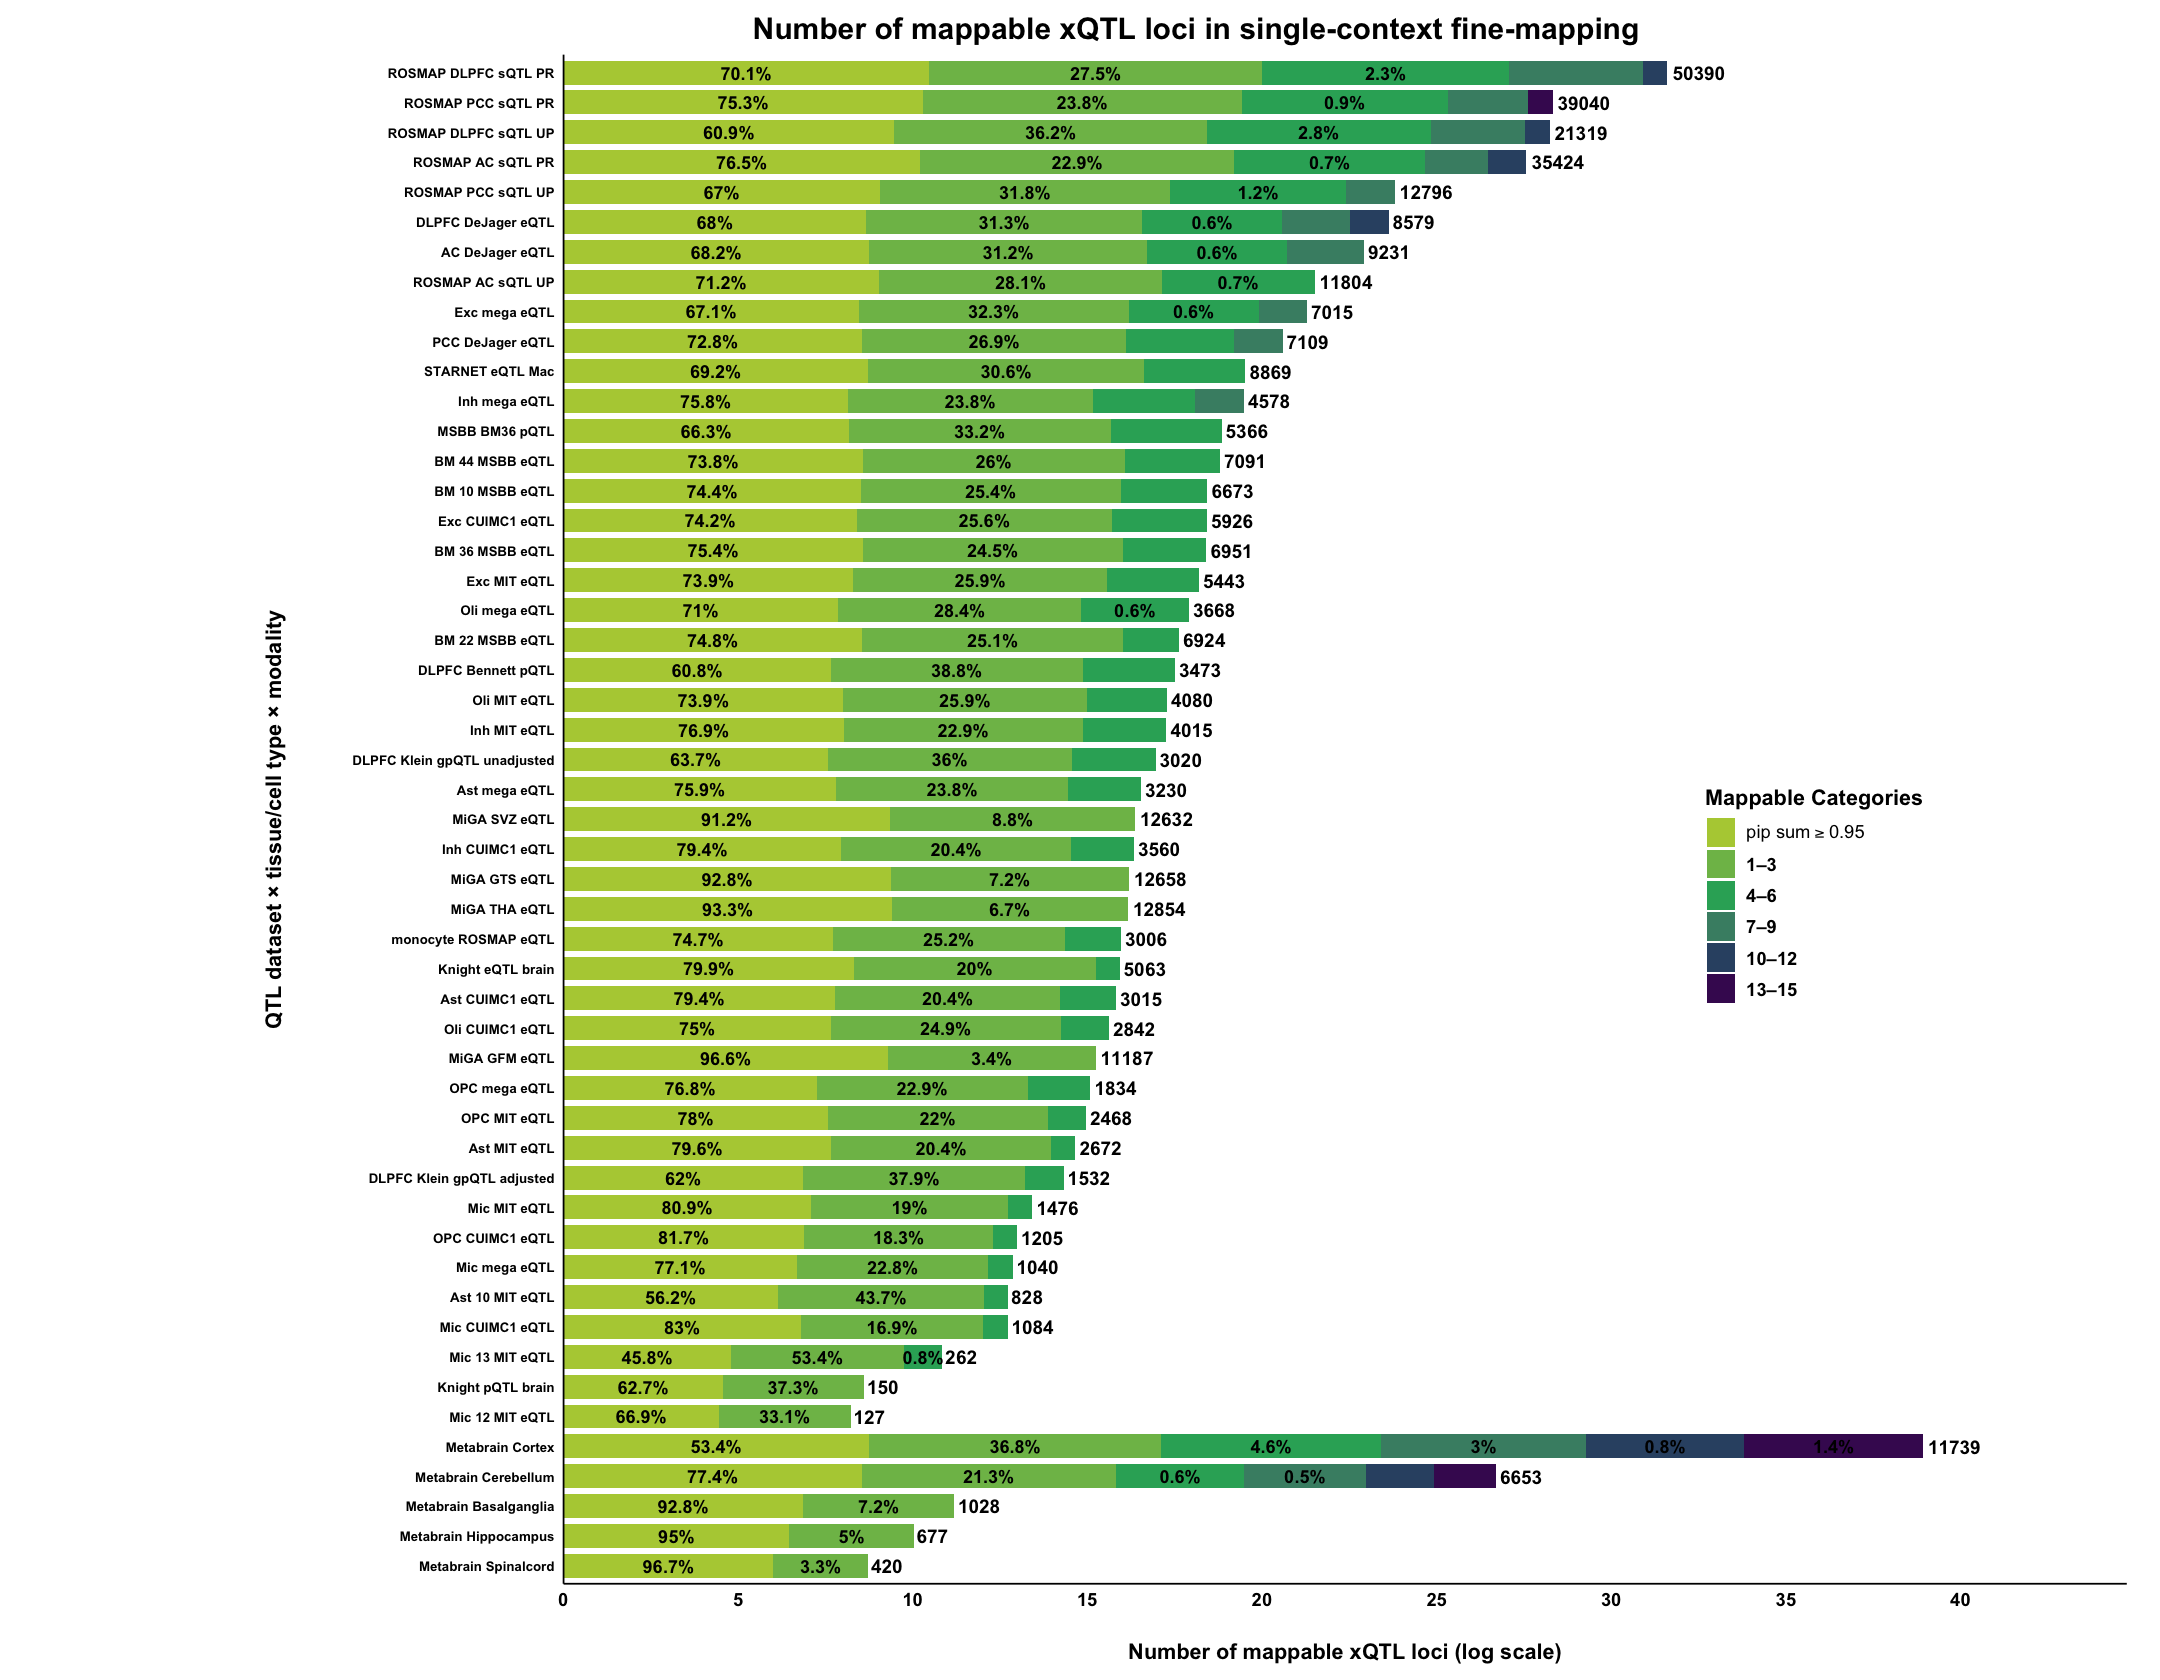

In [9]:
 # figure_1b_p2 (mappable data)
figure_1b_data_2 <- readRDS("/Users/shaoyuekun/Desktop/Dr.Wang/Figure_1b_num_xQTL_loci_single_context_2.rds")

original_order <- levels(figure_1b_data_2$mappable_data$resource)
figure_1b_data_2$mappable_data$resource <- as.character(figure_1b_data_2$mappable_data$resource)

apply_metadata_mapping <- function(resource_names, contexts_metadata) {
  result <- character(length(resource_names))
  
  for(i in seq_along(resource_names)) {
    name <- resource_names[i]
    
    # Check if contains cell type and needs transformation
    cell_types <- c("OPC", "Mic", "Inh", "Ast", "Oli", "Exc")
    contains_cell <- any(sapply(cell_types, function(cell) grepl(cell, name)))
    
    if(contains_cell) {
      metadata_key <- name
      metadata_key <- gsub("Kellis", "MIT", metadata_key)      
      metadata_key <- gsub("DeJager", "CUIMC1", metadata_key)  
      match_row <- contexts_metadata[contexts_metadata$context == metadata_key, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    } else {
     
      match_row <- contexts_metadata[contexts_metadata$context == name, ]
      
      if(nrow(match_row) > 0) {
        result[i] <- match_row$context[1]
      } else {
        result[i] <- name
      }
    }
  }
  
  return(result)
}
figure_1b_data_2$mappable_data$mapped_resource <- apply_metadata_mapping(
  figure_1b_data_2$mappable_data$resource, 
  contexts_metadata
)

figure_1b_data_2$mappable_data$mapped_resource <- gsub("_", " ", 
                                                       figure_1b_data_2$mappable_data$mapped_resource)

figure_1b_data_2$mappable_data <- figure_1b_data_2$mappable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()
figure_1b_data_2$color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")
options(repr.plot.width = 18, repr.plot.height = 14)
theme_set(theme_minimal(base_family = "Roboto"))

p2 <- ggplot(figure_1b_data_2$mappable_data,
             aes(x = factor(resource, levels = original_order), 
                 y = log_gene_count, 
                 fill = n_mappable_category)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, 
                               paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.8, fontface = "bold", lineheight = 0.9) +
  geom_text(data = function(x) x %>% 
              group_by(resource) %>%
              summarise(total_count = first(total_count), 
                        log_gene_count = sum(log_gene_count),
                        .groups = 'drop'),
            aes(x = factor(resource, levels = original_order), 
                y = log_gene_count, 
                label = total_count),
            hjust = -0.1, vjust = 0.5,
            color = "black", size = 4, fontface = "bold", inherit.aes = FALSE) +
  scale_fill_manual(values = figure_1b_data_2$color_palette_new, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), 
                                   "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  scale_x_discrete(labels = setNames(
    figure_1b_data_2$mappable_data$mapped_resource[
      match(unique(figure_1b_data_2$mappable_data$resource), 
            figure_1b_data_2$mappable_data$resource)],
    unique(figure_1b_data_2$mappable_data$resource)
  )) +
  labs(
    title = "Number of mappable xQTL loci in single-context fine-mapping",
    x = "QTL dataset × tissue/cell type × modality",   
    y = "Number of mappable xQTL loci (log scale)"   
  ) +
  coord_flip(clip = "off") +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 8),
                     labels = scales::comma,
                     expand = expansion(mult = c(0, 0.15))) + 
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "black"),   
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 11, color = "black", face = "bold"),
    axis.text.y = element_text(size = 8, color = "black", face = "bold"),
    
    axis.title.x = element_text(size = 13, face = "bold", margin = margin(t = 20), color = "black"), 
    axis.title.y = element_text(size = 13, face = "bold", margin = margin(r = 40), color = "black"),               
    
    legend.text = element_text(size = 11, color = "black", face = "bold"),
    legend.title = element_text(size = 13, face = "bold", color = "black"),
    legend.position = c(0.8, 0.45),
    legend.key.size = unit(1.3, "lines"),                              
    legend.key.height = unit(1.3, "lines"),
    legend.key.width = unit(1.3, "lines"),
    
    panel.grid = element_blank(),        
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    axis.line = element_line(color = "black", linewidth = 0.5),
    
    plot.margin = margin(10, 20, 10, 160)
  )

print(p2)



